# ④決定木

In [ ]:
決定木でエントロピーを計算する

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [2]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6444444444444445

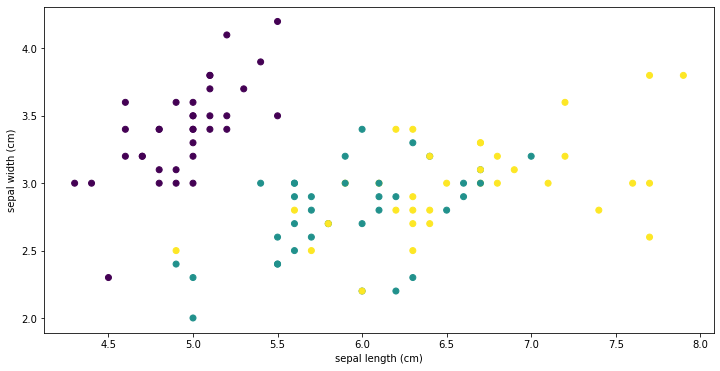

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['entropy'], 'max_depth' : [3,5,7,20]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 20]})

In [5]:
from sklearn.metrics import accuracy_score

y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.7555555555555555

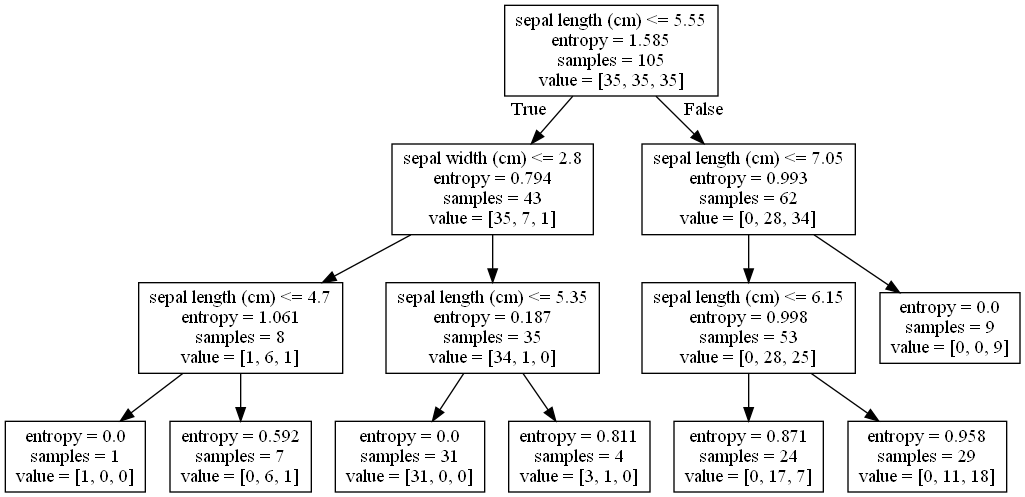

In [7]:
import numpy as np
from sklearn import tree
#from sklearn.externals.six import StringIO
from six import StringIO

import pydot
from IPython.display import Image

dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris, feature_names = iris.feature_names[:2])

#graph = pydot.graph_from_dot_data(dot_iris.getvalue())
graph, = pydot.graph_from_dot_data(dot_iris.getvalue())

Image(graph.create_png())